In [2]:
%matplotlib inline
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import sys
sys.path.append('../')
import pyEMsoft

In [3]:
# original image
image = data.camera()
# apply poisson noise on the image
poisson_image=pyEMsoft.filters.applypoissonnoise(image, image.shape[0], image.shape[1], 1)

Variable        Type       Data/Info
------------------------------------
data            module     <module 'skimage.data' fr<...>kimage/data/__init__.py'>
image           ndarray    512x512: 262144 elems, type `uint8`, 262144 bytes (256.0 kb)
np              module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt             module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
poisson_image   ndarray    512x512: 262144 elems, type `float32`, 1048576 bytes (1.0 Mb)
pyEMsoft        module     <module 'pyEMsoft' from '../pyEMsoft.py'>
sys             module     <module 'sys' (built-in)>


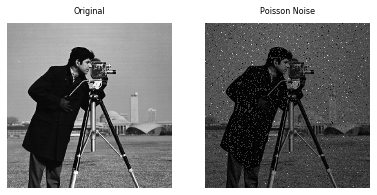

In [4]:
# plot the original image and the image with poisson noise
plt.figure
plt.subplots_adjust(wspace=0.2,hspace=0.3,top=0.85,left=0.08,right=0.92,bottom=0.08) 
ax = plt.subplot(121)
plt.imshow(image,cmap='gray')
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('Original',fontsize=8,y=1.02)

ax = plt.subplot(122)
plt.imshow(poisson_image,cmap='gray')
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('Poisson Noise',fontsize=8,y=1.02)
plt.show()

In [5]:
# calculate the histograms of the two images above
image_histogram = pyEMsoft.filters.image_histogram(image.shape[0], image.shape[1], image)
poisson_image_histogram = pyEMsoft.filters.image_histogram(image.shape[0], image.shape[1], poisson_image)
# compute the Shannon entropy of the two images 
image_entropy = pyEMsoft.filters.image_entropy(image_histogram)
poisson_image_entropy = pyEMsoft.filters.image_entropy(poisson_image_histogram)
print('Entropy of original image:', image_entropy, 'Entropy of Poisson image:', poisson_image_entropy)

Entropy of original image: 4.883726119995117 Entropy of Poisson image: 5.165998935699463


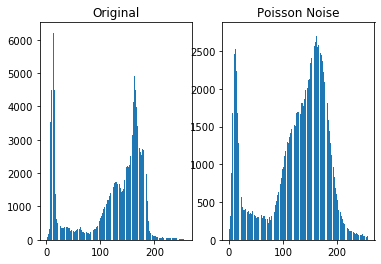

In [6]:
# plot the histograms
x=np.linspace(1,256,256)
plt.figure
ax = plt.subplot(121)
plt.bar(x,image_histogram)
ax.set_title('Original')
ax = plt.subplot(122)
plt.bar(x, poisson_image_histogram)
ax.set_title('Poisson Noise')
plt.show()

In [7]:
# joint image histogram
joint_histogram = pyEMsoft.filters.image_jointhistogram(image.shape[0], image.shape[1], image, poisson_image)
# joint image entropy
joint_image_entropy = pyEMsoft.filters.image_jointentropy(joint_histogram)
print('Joint image entropy:', joint_image_entropy)


Joint image entropy: 8.832399368286133


Text(0.5, 1.0, 'Joint Histogram')

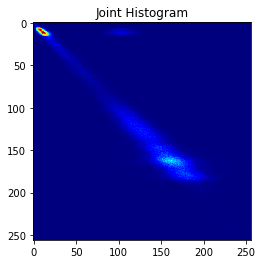

In [8]:
# plot the joint histogram (2D)
plt.figure
plt.imshow(joint_histogram, cmap='jet')
plt.title('Joint Histogram')